In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the Road Safety Open Dataset Data Guide

Guide = pd.read_excel('Road-Safety-Open-Dataset-Data-Guide.xlsx')

# import data 2016-2020

accidents_last5 = pd.read_csv("dft-road-casualty-statistics-accident-last-5-years.csv")
casualty_last5 = pd.read_csv("dft-road-casualty-statistics-casualty-last-5-years.csv")
vehicle_last5 = pd.read_csv("dft-road-casualty-statistics-vehicle-last-5-years.csv")

# import data 2021

accident21 = pd.read_csv("dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021.csv")
casualty21 = pd.read_csv("dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2021.csv")
vehicle21 = pd.read_csv("dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2021.csv")


In [3]:
len(accidents_last5)

597973

In [4]:
len(accident21)

42358

In [5]:
# merging the data

accidents_last55 = pd.concat([accidents_last5,accident21])
casualty_last55 = pd.concat([casualty_last5,casualty21])
vehicle_last55 = pd.concat([vehicle_last5,vehicle21])

In [6]:
accidents_last55=accidents_last55[accidents_last55['accident_severity'] == 2]
lst = list(accidents_last55["accident_index"])
casualty_last55= casualty_last55[casualty_last55['accident_index'].isin(lst)]
vehicle_last55= vehicle_last55[vehicle_last55['accident_index'].isin(lst)]


In [7]:
# number of accidents per month

accidents_last55["Month"] = [x[-7::] for x in accidents_last55.date]
accidents_count = pd.DataFrame(accidents_last55["Month"].value_counts())
accidents_count.index = pd.to_datetime(accidents_count.index)
accidents_count = accidents_count.sort_index()
accidents_count

,Month
2016-01-01,1700
2016-02-01,1525
2016-03-01,1615
2016-04-01,1541
2016-05-01,1829
...,...
2021-02-01,1003
2021-03-01,1359
2021-04-01,1669
2021-05-01,1755


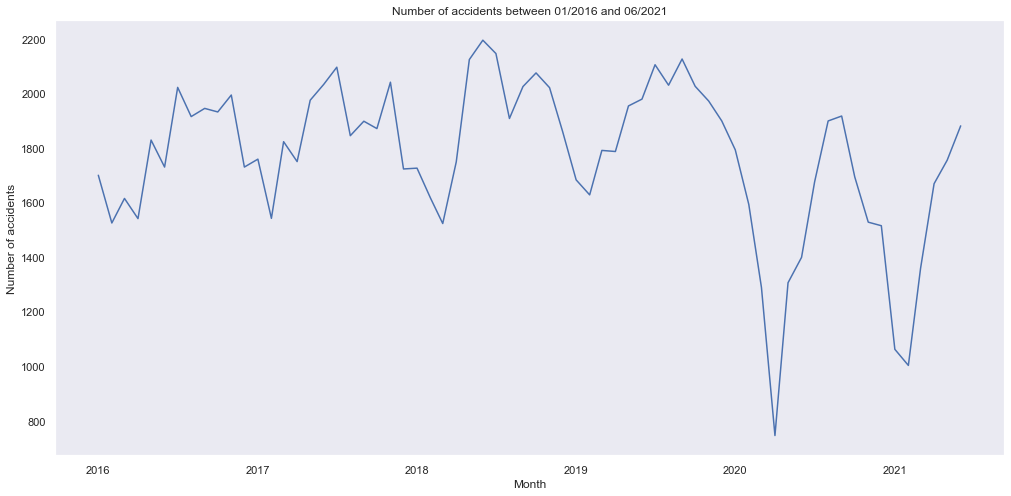

In [8]:
# Plot number of accidents per month

plt.figure(figsize=(17, 8))
plt.plot(accidents_count)
plt.title('Number of accidents between 01/2016 and 06/2021')
plt.ylabel('Number of accidents')
plt.xlabel('Month')
plt.grid(False)
plt.show()

In [9]:
accidents_last5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597973 non-null  object 
 1   accident_year                                597973 non-null  int64  
 2   accident_reference                           597973 non-null  object 
 3   location_easting_osgr                        597850 non-null  float64
 4   location_northing_osgr                       597850 non-null  float64
 5   longitude                                    597840 non-null  float64
 6   latitude                                     597840 non-null  float64
 7   police_force                                 597973 non-null  int64  
 8   accident_severity                            597973 non-null  int64  
 9   number_of_vehicles                           597973 non-nul

In [10]:
# checking for duplicates

print("The number of duplicates on accidents data is:",accidents_last55.duplicated().sum())
print("The number of duplicates on casualty data is:",casualty_last55.duplicated().sum())
print("The number of duplicates on vehicle data is:",vehicle_last55.duplicated().sum())

The number of duplicates on accidents data is: 0
The number of duplicates on casualty data is: 0
The number of duplicates on vehicle data is: 0


# Accidents data analysis

In [11]:
accidents_last55.isnull().sum()

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                             149
location_northing_osgr                            149
longitude                                        8754
latitude                                         8754
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number           

In [12]:
accidents_last55 = accidents_last55.drop(columns = ['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'status'])
accidents_last55.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,116866.0,2018.175971,1.546800,2016.0,2017.0,2018.0,2019.0,2021.0
police_force,116866.0,31.124750,25.573229,1.0,7.0,32.0,46.0,99.0
accident_severity,116866.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
number_of_vehicles,116866.0,1.732557,0.750773,1.0,1.0,2.0,2.0,24.0
number_of_casualties,116866.0,1.374018,0.932330,1.0,1.0,1.0,1.0,59.0
day_of_week,116866.0,4.095913,1.972063,1.0,2.0,4.0,6.0,7.0
local_authority_district,116866.0,330.865419,265.802694,-1.0,80.0,305.0,514.0,941.0
first_road_class,116866.0,4.231196,1.440579,1.0,3.0,4.0,6.0,6.0
first_road_number,116866.0,818.659867,1632.884097,0.0,0.0,35.0,601.0,9176.0
road_type,116866.0,5.319169,1.523694,1.0,6.0,6.0,6.0,9.0


In [13]:
accidents_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116866 entries, 13 to 42356
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               116866 non-null  object 
 1   accident_year                                116866 non-null  int64  
 2   accident_reference                           116866 non-null  object 
 3   police_force                                 116866 non-null  int64  
 4   accident_severity                            116866 non-null  int64  
 5   number_of_vehicles                           116866 non-null  int64  
 6   number_of_casualties                         116866 non-null  int64  
 7   date                                         116866 non-null  object 
 8   day_of_week                                  116866 non-null  int64  
 9   time                                         116866 non-nul

In [14]:
# Number of accidents per year

accidents_last55.accident_year.value_counts()

2019    22980
2018    22968
2017    22356
2016    21478
2020    18355
2021     8729
Name: accident_year, dtype: int64

In [15]:
# recoding accident severity

accidents_last55['accident_severity'] = accidents_last55['accident_severity'].astype('category')
accidents_last55['accident_severity'] = accidents_last55['accident_severity'].cat.rename_categories({1: 'Fatal', 2: 'Serious', 3: 'Slight'})

In [16]:
# number_of_vehicles

number_of_vehicles_count = pd.DataFrame(accidents_last55.number_of_vehicles.value_counts())
number_of_vehicles_count = number_of_vehicles_count.sort_index()


In [17]:
# number_of_casualties

number_of_casualties_count = pd.DataFrame(accidents_last55.number_of_casualties.value_counts())
number_of_casualties_count = number_of_casualties_count.sort_index()


In [18]:
# change type of date column
accidents_last55.date = pd.to_datetime(accidents_last55.date)

In [19]:
# recoding day_of_week

accidents_last55['day_of_week'] = accidents_last55['day_of_week'].astype('category')
accidents_last55['day_of_week'] = accidents_last55['day_of_week'].cat.rename_categories({1:'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})

In [20]:
# day_of_week

day_of_week_count = pd.DataFrame(accidents_last55.day_of_week.value_counts())
day_of_week_count = day_of_week_count.sort_index()
day_of_week_count

,day_of_week
Sunday,14941
Monday,15819
Tuesday,16665
Wednesday,16969
Thursday,17157
Friday,18767
Saturday,16548


In [21]:
accidents_last55.hour = pd.to_datetime(accidents_last55.time).dt.hour
hour_count = pd.DataFrame(accidents_last55.hour.value_counts())
hour_count = hour_count.sort_index()


<Figure size 864x432 with 0 Axes>

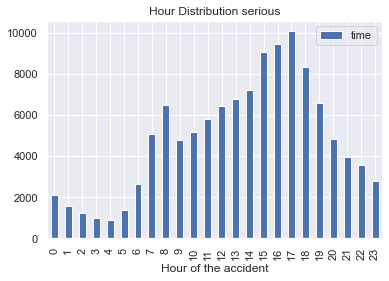

In [22]:
plt.figure(figsize=(12, 6))
hour_count.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution serious")
plt.show()

In [23]:
day_of_week_count2 = accidents_last55.groupby(["day_of_week","date"]).size()

In [24]:
# mean and std of number of accidents per day of week

mean_for_day_of_week = pd.DataFrame(day_of_week_count2.mean(level=0))
mean_for_day_of_week['standard deviation'] = day_of_week_count2.std(level=0)
mean_for_day_of_week.columns=['Mean','Standard deviation']
mean_for_day_of_week

,Mean,Standard deviation
day_of_week,,
Sunday,7.440737,19.146733
Monday,7.877988,19.919383
Tuesday,8.299303,20.977663
Wednesday,8.450697,21.443720
Thursday,8.544323,21.579023
Friday,9.346116,23.614771
Saturday,8.241036,20.833328


In [25]:
sub_monday = accidents_last55[accidents_last55['day_of_week'] == 'Monday']
sub_monday.hour = pd.to_datetime(sub_monday.time).dt.hour


In [26]:
hour_count = pd.DataFrame(sub_monday.hour.value_counts())
hour_count = hour_count.sort_index()

<Figure size 864x432 with 0 Axes>

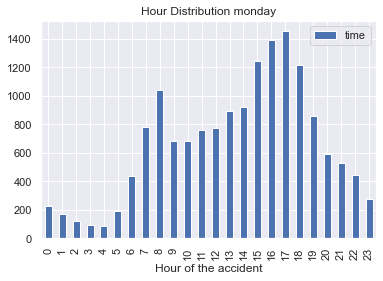

In [27]:
plt.figure(figsize=(12, 6))
hour_count.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution monday")
plt.show()

In [28]:
sub_Tuesday = accidents_last55[accidents_last55['day_of_week'] == 'Tuesday']
sub_Tuesday.hour = pd.to_datetime(sub_Tuesday.time).dt.hour
hour_count_Tuesday = pd.DataFrame(sub_Tuesday.hour.value_counts())
hour_count_Tuesday = hour_count_Tuesday.sort_index()

<Figure size 864x432 with 0 Axes>

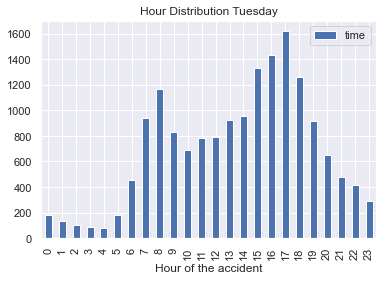

In [29]:
plt.figure(figsize=(12, 6))
hour_count_Tuesday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Tuesday")
plt.show()

In [30]:
sub_Wednesday = accidents_last55[accidents_last55['day_of_week'] == 'Wednesday']
sub_Wednesday.hour = pd.to_datetime(sub_Wednesday.time).dt.hour
hour_count_Wednesday = pd.DataFrame(sub_Wednesday.hour.value_counts())
hour_count_Wednesday = hour_count_Wednesday.sort_index()

<Figure size 864x432 with 0 Axes>

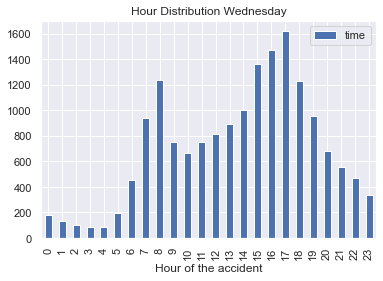

In [31]:
plt.figure(figsize=(12, 6))
hour_count_Wednesday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Wednesday")
plt.show()

In [32]:
sub_Thursday = accidents_last55[accidents_last55['day_of_week'] == 'Thursday']
sub_Thursday.hour = pd.to_datetime(sub_Thursday.time).dt.hour
hour_count_Thursday = pd.DataFrame(sub_Thursday.hour.value_counts())
hour_count_Thursday = hour_count_Thursday.sort_index()

<Figure size 864x432 with 0 Axes>

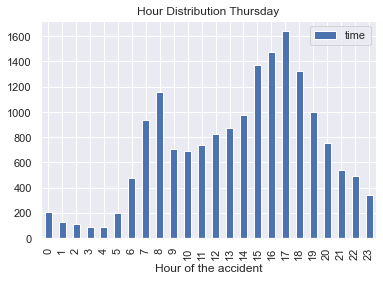

In [33]:
plt.figure(figsize=(12, 6))
hour_count_Thursday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Thursday")
plt.show()

In [34]:
sub_Friday = accidents_last55[accidents_last55['day_of_week'] == 'Friday']
sub_Friday.hour = pd.to_datetime(sub_Friday.time).dt.hour
hour_count_Friday = pd.DataFrame(sub_Friday.hour.value_counts())
hour_count_Friday = hour_count_Friday.sort_index()

<Figure size 864x432 with 0 Axes>

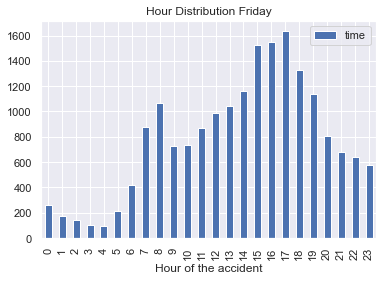

In [35]:
plt.figure(figsize=(12, 6))
hour_count_Friday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Friday")
plt.show()

In [36]:
sub_Saturday = accidents_last55[accidents_last55['day_of_week'] == 'Saturday']
sub_Saturday.hour = pd.to_datetime(sub_Saturday.time).dt.hour
hour_count_Saturday = pd.DataFrame(sub_Saturday.hour.value_counts())
hour_count_Saturday = hour_count_Saturday.sort_index()

<Figure size 864x432 with 0 Axes>

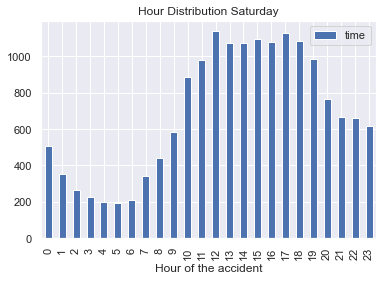

In [37]:
plt.figure(figsize=(12, 6))
hour_count_Saturday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Saturday")
plt.show()

In [38]:
sub_Sunday = accidents_last55[accidents_last55['day_of_week'] == 'Sunday']
sub_Sunday.hour = pd.to_datetime(sub_Sunday.time).dt.hour
hour_count_Sunday = pd.DataFrame(sub_Sunday.hour.value_counts())
hour_count_Sunday = hour_count_Sunday.sort_index()

<Figure size 864x432 with 0 Axes>

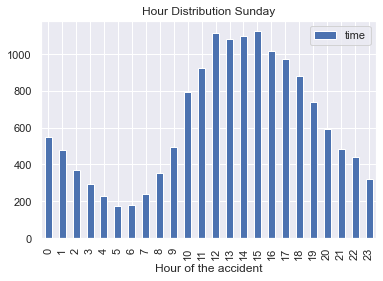

In [39]:
plt.figure(figsize=(12, 6))
hour_count_Sunday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Sunday")
plt.show()

In [40]:
# Month

accidents_last55["Month_no"] = accidents_last55['Month'].str[:2]
Month_no_count = accidents_last55.Month_no.value_counts().sort_index()


In [45]:
Month_no_count

01     9723
02     8907
03     9400
04     9242
05    10943
06    11217
07    10045
08     9597
09     9911
10     9598
11     9556
12     8727
Name: Month_no, dtype: int64

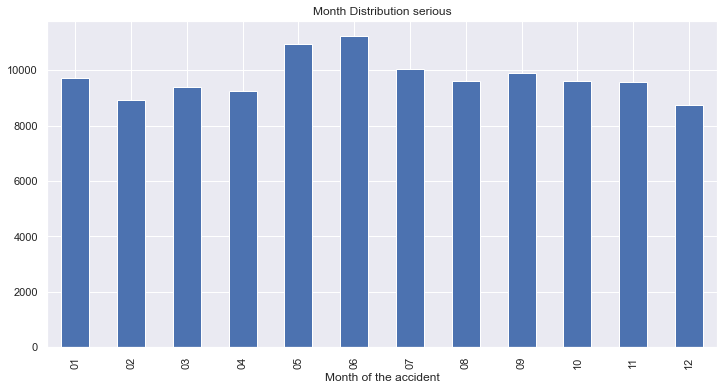

In [44]:
plt.figure(figsize=(12, 6))
Month_no_count.plot(kind='bar')
plt.xlabel('Month of the accident')
plt.title("Month Distribution serious")
plt.show()

In [42]:
# first_road_class

accidents_last55.first_road_class.value_counts()

3    50965
6    40715
4    15563
5     6288
1     3064
2      271
Name: first_road_class, dtype: int64

In [43]:
# road_type

accidents_last55.road_type.value_counts()

6    90890
3    16074
1     5267
2     2374
7     1148
9     1113
Name: road_type, dtype: int64

In [40]:
accidents_last55['road_type'] = accidents_last55['road_type'].replace([-1],9)

In [41]:
accidents_last55.road_type.value_counts()

6    90890
3    16074
1     5267
2     2374
7     1148
9     1113
Name: road_type, dtype: int64

In [42]:
# recoding road_type

accidents_last55['road_type'] = accidents_last55['road_type'].astype('category')
accidents_last55['road_type'] = accidents_last55['road_type'].cat.rename_categories({1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'})

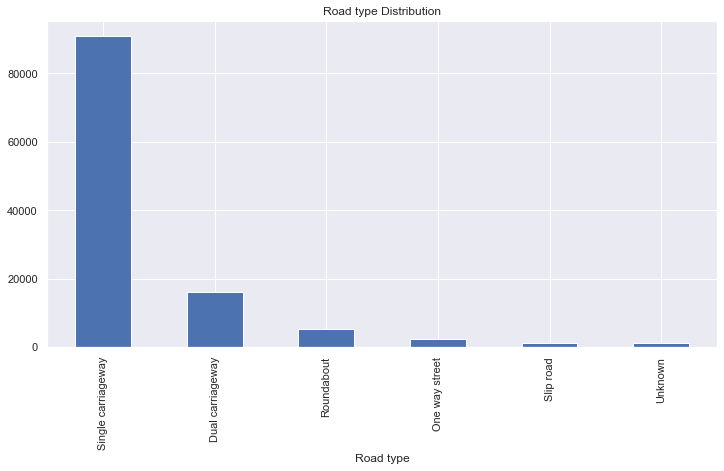

In [43]:
plt.figure(figsize=(12, 6))
accidents_last55.road_type.value_counts().plot(kind='bar')
plt.xlabel('Road type')
plt.title("Road type Distribution")
plt.show()

In [44]:
# speed_limit

accidents_last55['speed_limit'] = accidents_last55['speed_limit'].fillna(-1)

In [45]:
accidents_last55.speed_limit.value_counts()

 30.0    64937
 60.0    20782
 40.0    10445
 20.0     8754
 70.0     6768
 50.0     5161
-1.0        19
Name: speed_limit, dtype: int64

In [46]:
# recoding speed_limit

accidents_last55['speed_limit'] = accidents_last55['speed_limit'].astype('category')
accidents_last55['speed_limit'] = accidents_last55['speed_limit'].cat.rename_categories({-1: 'Unkown'})

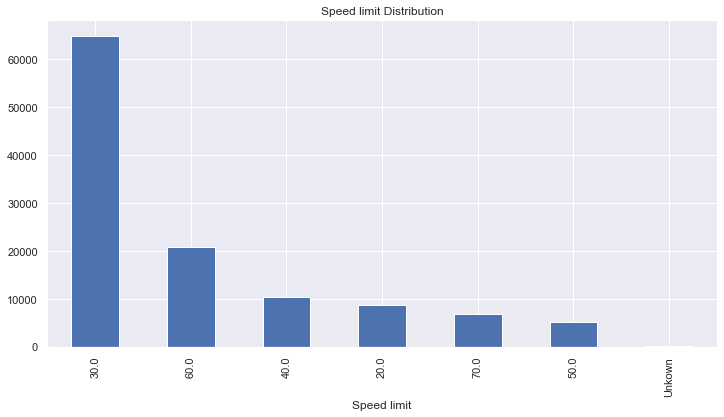

In [47]:
plt.figure(figsize=(12, 6))
accidents_last55.speed_limit.value_counts().plot(kind='bar')
plt.xlabel('Speed limit')
plt.title("Speed limit Distribution")
plt.show()

In [48]:
# junction_detail

accidents_last55.junction_detail.value_counts()

0     54038
3     34304
6      9886
1      6936
9      4837
8      2921
5      1260
7      1226
2      1166
99      292
Name: junction_detail, dtype: int64

In [49]:
accidents_last55['junction_detail'] = accidents_last55['junction_detail'].replace([-1],99)
accidents_last55.junction_detail.value_counts()

0     54038
3     34304
6      9886
1      6936
9      4837
8      2921
5      1260
7      1226
2      1166
99      292
Name: junction_detail, dtype: int64

In [50]:
# recoding junction_detail

accidents_last55['junction_detail'] = accidents_last55['junction_detail'].astype('category')
accidents_last55['junction_detail'] = accidents_last55['junction_detail'].cat.rename_categories({0: 'Not at or within 20 metres of junction', 1: 'Roundabout', 2: 'Mini roundabout ', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroads', 7: 'Junction more than four arms', 8: 'Using private drive or entrance', 9: 'Other junction', 99: 'Unknown'})

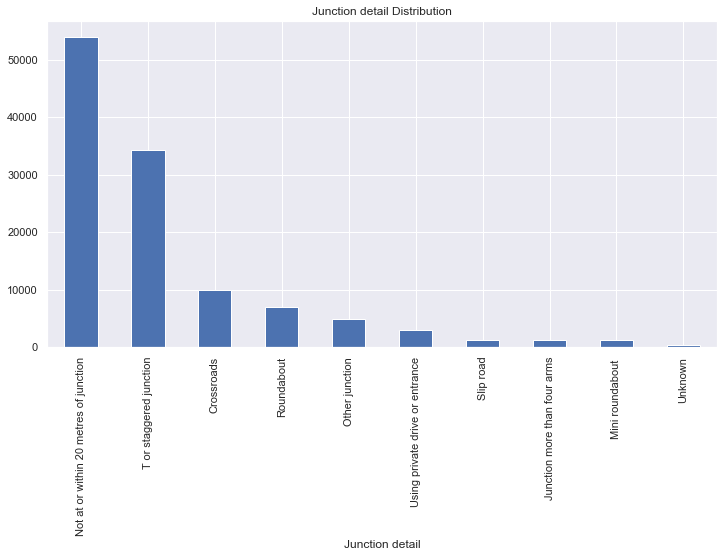

In [51]:
plt.figure(figsize=(12, 6))
accidents_last55.junction_detail.value_counts().plot(kind='bar')
plt.xlabel('Junction detail')
plt.title("Junction detail Distribution")
plt.show()

In [52]:
# junction_control

accidents_last55.junction_control.value_counts()

-1    54198
 4    51015
 2     9979
 3      651
 9      539
 1      381
 0      103
Name: junction_control, dtype: int64

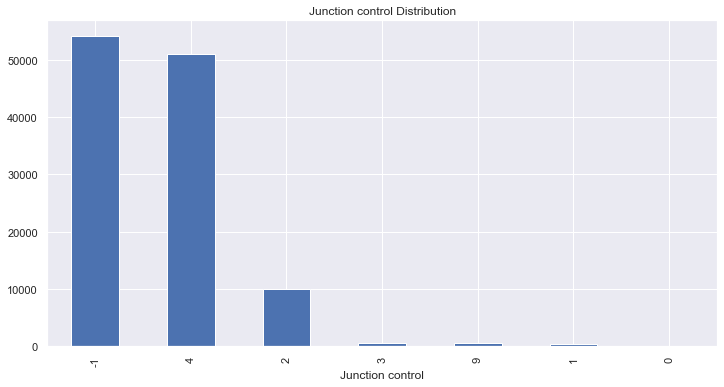

In [53]:
plt.figure(figsize=(12, 6))
accidents_last55.junction_control.value_counts().plot(kind='bar')
plt.xlabel('Junction control')
plt.title("Junction control Distribution")
plt.show()

In [54]:
# pedestrian_crossing_human_control

accidents_last55.pedestrian_crossing_human_control.value_counts()

 0    114427
 2      1038
 9       922
 1       370
-1       109
Name: pedestrian_crossing_human_control, dtype: int64

In [55]:
accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].replace([-1],9)
accidents_last55.pedestrian_crossing_human_control.value_counts()

0    114427
2      1038
9      1031
1       370
Name: pedestrian_crossing_human_control, dtype: int64

In [56]:
# recoding junction_detail

accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].astype('category')
accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].cat.rename_categories({0: 'None within 50 metres', 1: 'Control by school crossing patrol', 2: 'Control by other authorised person', 9: 'Unknown'})

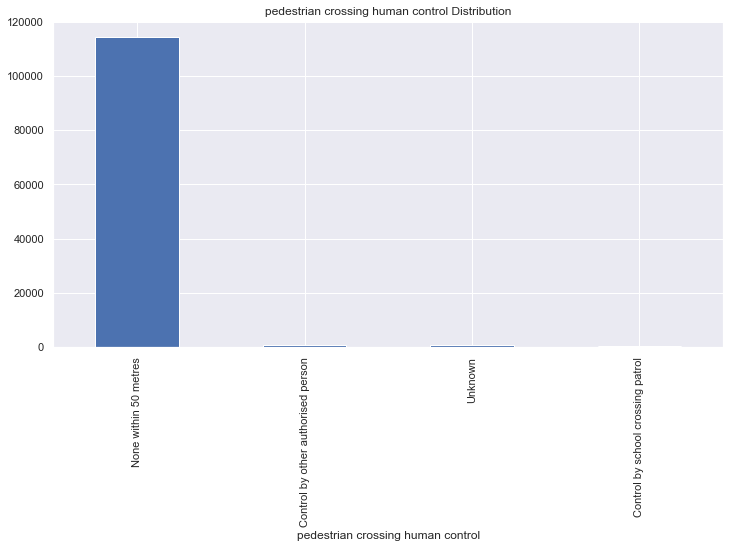

In [57]:
plt.figure(figsize=(12, 6))
accidents_last55.pedestrian_crossing_human_control.value_counts().plot(kind='bar')
plt.xlabel('pedestrian crossing human control')
plt.title("pedestrian crossing human control Distribution")
plt.show()

In [58]:
# pedestrian_crossing_physical_facilities

accidents_last55.pedestrian_crossing_physical_facilities.unique()

array([ 0,  4,  8,  5,  1,  9,  7, -1], dtype=int64)

In [59]:
accidents_last55.pedestrian_crossing_physical_facilities.value_counts()

 0    94501
 5     7478
 4     6856
 1     3705
 8     3147
 9      865
 7      217
-1       97
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [60]:
accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].replace([-1,9],7)
accidents_last55.pedestrian_crossing_physical_facilities.value_counts()

0    94501
5     7478
4     6856
1     3705
8     3147
7     1179
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [61]:
# recoding pedestrian_crossing_physical_facilities

accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].astype('category')
accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].cat.rename_categories({0: 'No physical crossing facility within 50m', 1: 'Zebra crossing', 4: 'Pelican, puffin, toucan or similar', 5: 'Pedestrian phase at traffic signal junction', 7: 'Footbridge or subway', 8: 'Central refuge'})

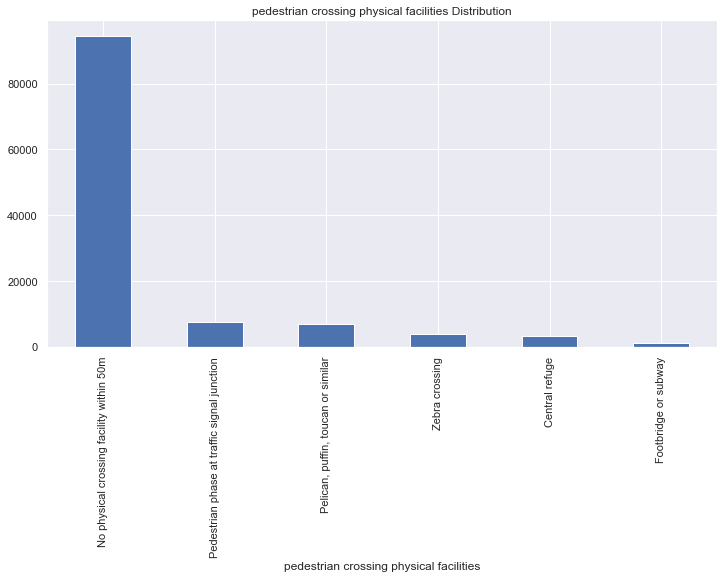

In [62]:
plt.figure(figsize=(12, 6))
accidents_last55.pedestrian_crossing_physical_facilities.value_counts().plot(kind='bar')
plt.xlabel('pedestrian crossing physical facilities')
plt.title("pedestrian crossing physical facilities Distribution")
plt.show()

In [63]:
# light_conditions

accidents_last55.light_conditions.value_counts()

1    81304
4    24652
6     8124
7     1875
5      911
Name: light_conditions, dtype: int64

In [64]:
accidents_last55['light_conditions'] = accidents_last55['light_conditions'].replace([-1],7)
accidents_last55.light_conditions.value_counts()

1    81304
4    24652
6     8124
7     1875
5      911
Name: light_conditions, dtype: int64

In [65]:
# recoding light_conditions

accidents_last55['light_conditions'] = accidents_last55['light_conditions'].astype('category')
accidents_last55['light_conditions'] = accidents_last55['light_conditions'].cat.rename_categories({1: 'Daylight', 4: 'Darkness: street lights present and lit', 5: 'Darkness: street lights present but unlit', 6: 'Darkness: no street lighting', 7: 'Darkness: street lighting unknown'})

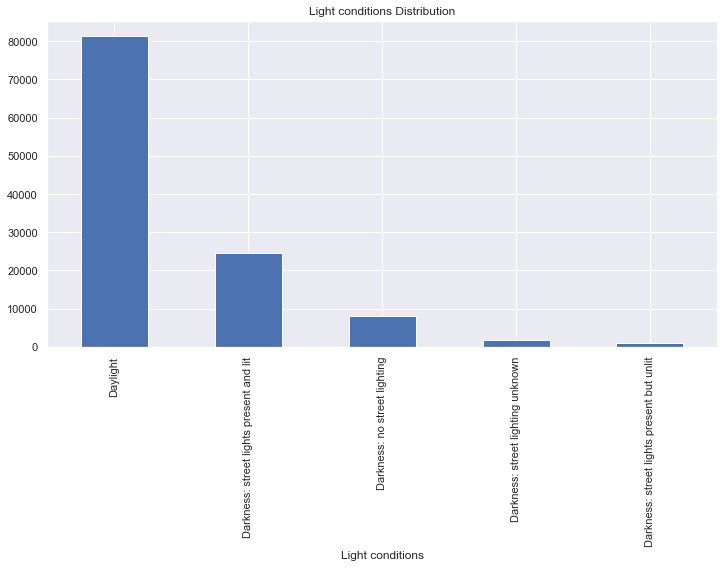

In [66]:
plt.figure(figsize=(12, 6))
accidents_last55.light_conditions.value_counts().plot(kind='bar')
plt.xlabel('Light conditions')
plt.title("Light conditions Distribution")
plt.show()

In [67]:
# weather_conditions

accidents_last55.weather_conditions.value_counts()

 1    95729
 2    12591
 9     2279
 8     2214
 5     1502
 4     1386
 7      572
 3      475
 6      117
-1        1
Name: weather_conditions, dtype: int64

In [68]:
accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].replace([-1,9],8)
accidents_last55.weather_conditions.value_counts()

1    95729
2    12591
8     4494
5     1502
4     1386
7      572
3      475
6      117
Name: weather_conditions, dtype: int64

In [69]:
# recoding weather_conditions

accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].astype('category')
accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].cat.rename_categories({1: 'Fine without high winds', 2: 'Raining without high winds', 3: 'Snowing without high winds', 4: 'Fine with high winds', 5: 'Raining with high winds', 6: 'Snowing with high winds', 7: 'Fog or mist', 8: 'Other'})

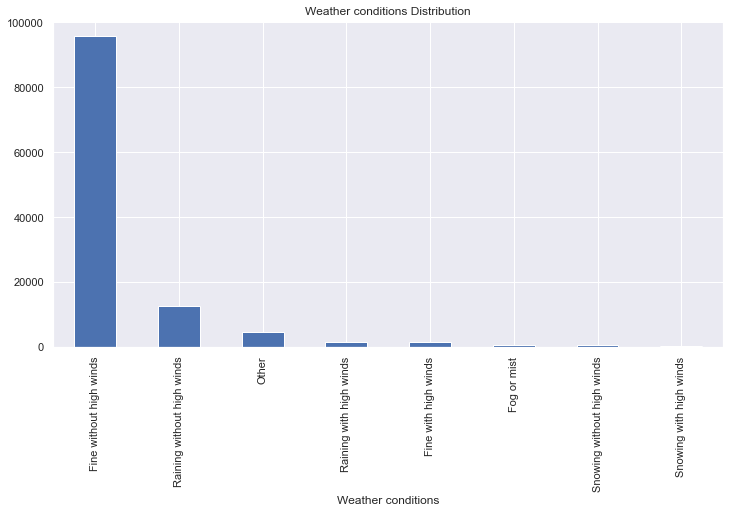

In [70]:
plt.figure(figsize=(12, 6))
accidents_last55.weather_conditions.value_counts().plot(kind='bar')
plt.xlabel('Weather conditions')
plt.title("Weather conditions Distribution")
plt.show()

In [71]:
# road_surface_conditions

accidents_last55.road_surface_conditions.value_counts()

 1    84117
 2    30201
 4     1460
 9      386
 3      364
-1      181
 5      157
Name: road_surface_conditions, dtype: int64

In [72]:
accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].replace([-1],9)
accidents_last55.road_surface_conditions.value_counts()

1    84117
2    30201
4     1460
9      567
3      364
5      157
Name: road_surface_conditions, dtype: int64

In [73]:
# recoding road_surface_conditions

accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].astype('category')
accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].cat.rename_categories({1: 'Dry', 2: 'Wet / Damp', 3: 'Snow', 4: 'Frost / Ice', 5: 'Flood', 9: 'Unknown'})

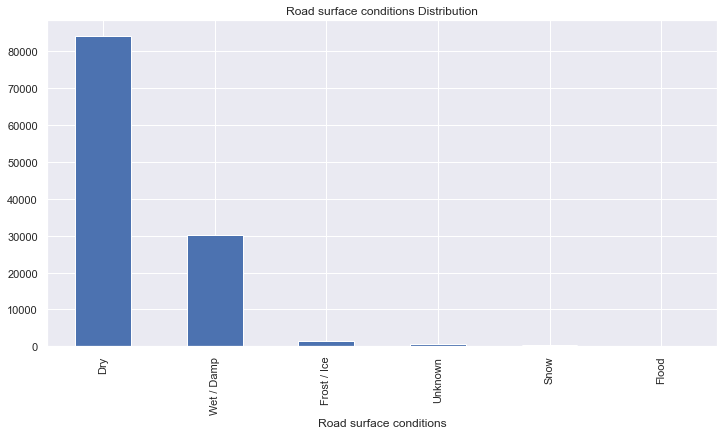

In [74]:
plt.figure(figsize=(12, 6))
accidents_last55.road_surface_conditions.value_counts().plot(kind='bar')
plt.xlabel('Road surface conditions')
plt.title("Road surface conditions Distribution")
plt.show()

In [75]:
# special_conditions_at_site

accidents_last55.special_conditions_at_site.value_counts()

 0    113504
 4      1151
 9       567
 5       449
 7       353
 6       280
 1       239
 3       179
-1       107
 2        37
Name: special_conditions_at_site, dtype: int64

In [76]:
accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].replace([-1],9)
accidents_last55.special_conditions_at_site.value_counts()

0    113504
4      1151
9       674
5       449
7       353
6       280
1       239
3       179
2        37
Name: special_conditions_at_site, dtype: int64

In [77]:
# recoding special_conditions_at_site

accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].astype('category')
accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].cat.rename_categories({0: 'None', 1: 'Auto traffic signal out', 2: 'Auto traffic signal partially defective', 3: 'Permanent road signing or marking defective or obsured', 4: 'Roadworks', 5: 'Road surface defective', 6: 'Oil or diesel', 7: 'Mud', 9: 'Unknown'})

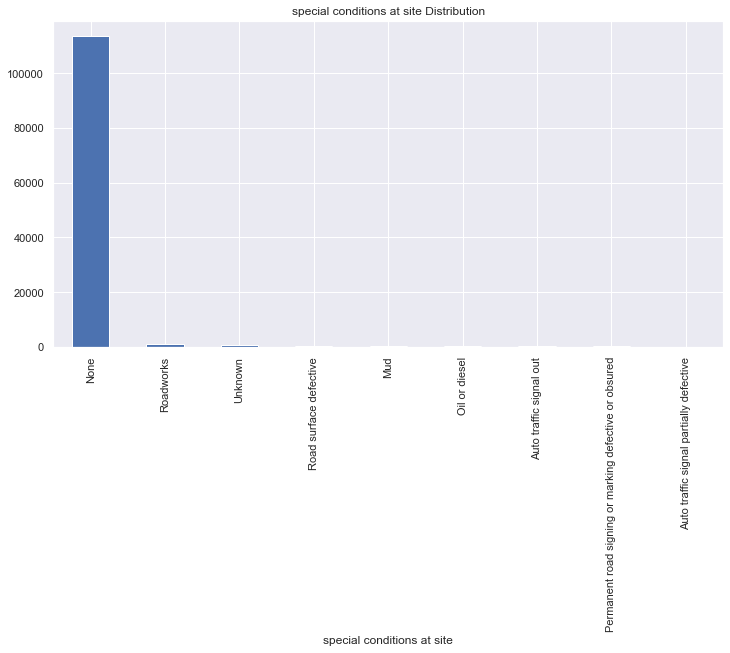

In [78]:
plt.figure(figsize=(12, 6))
accidents_last55.special_conditions_at_site.value_counts().plot(kind='bar')
plt.xlabel('special conditions at site')
plt.title("special conditions at site Distribution")
plt.show()

In [79]:
# carriageway_hazards

accidents_last55.carriageway_hazards.value_counts()

 0    113811
 2      1323
 9       514
 7       461
 1       235
 3       210
 6       206
-1       106
Name: carriageway_hazards, dtype: int64

In [80]:
accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].replace([-1],9)
accidents_last55.carriageway_hazards.value_counts()

0    113811
2      1323
9       620
7       461
1       235
3       210
6       206
Name: carriageway_hazards, dtype: int64

In [81]:
# recoding carriageway_hazards

accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].astype('category')
accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].cat.rename_categories({0: 'None', 1: 'Dislodged vehicle load in carriageway', 2: 'Other object in carriageway', 3: 'Involvement with previous accident', 6: 'Pedestrian in carriageway - not injured', 7: 'Any animal in carriageway (except ridden horse)', 9: 'Unknown'})

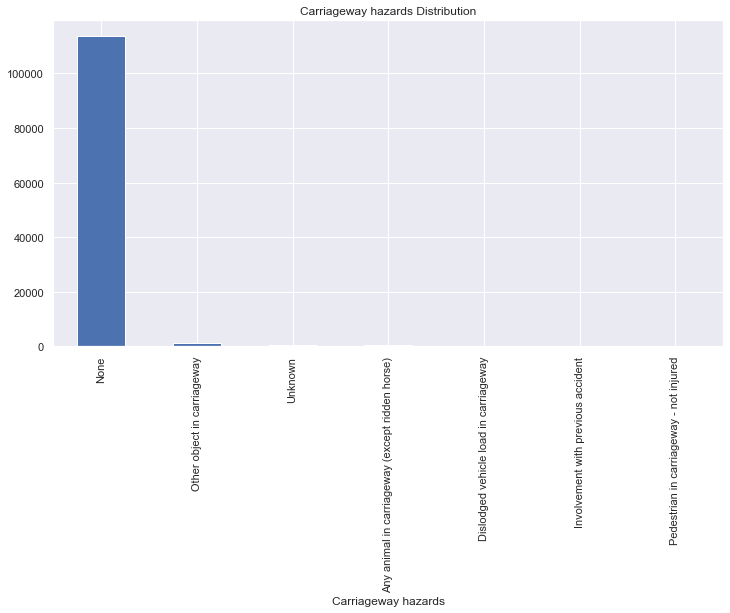

In [82]:
plt.figure(figsize=(12, 6))
accidents_last55.carriageway_hazards.value_counts().plot(kind='bar')
plt.xlabel('Carriageway hazards')
plt.title("Carriageway hazards Distribution")
plt.show()

In [83]:
# urban_or_rural_area

accidents_last55.urban_or_rural_area.value_counts()

 1    65260
 2    42855
-1     8729
 3       22
Name: urban_or_rural_area, dtype: int64

In [84]:
# recoding carriageway_hazards
accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].replace([-1],3)

accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].astype('category')
accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].cat.rename_categories({1: 'Urban', 2: 'Rural', 3: 'Unallocated'})

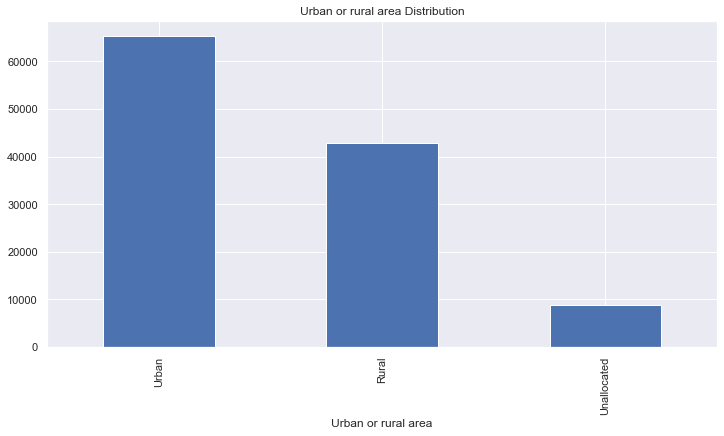

In [85]:
plt.figure(figsize=(12, 6))
accidents_last55.urban_or_rural_area.value_counts().plot(kind='bar')
plt.xlabel('Urban or rural area')
plt.title("Urban or rural area Distribution")
plt.show()

In [86]:
# did_police_officer_attend_scene_of_accident

accidents_last55.did_police_officer_attend_scene_of_accident.value_counts()

 1    96356
 2    18731
 3     1777
-1        2
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [87]:
# recoding carriageway_hazards

accidents_last55['did_police_officer_attend_scene_of_accident'] = accidents_last55['did_police_officer_attend_scene_of_accident'].astype('category')
accidents_last55['did_police_officer_attend_scene_of_accident'] = accidents_last55['did_police_officer_attend_scene_of_accident'].cat.rename_categories({1: 'Yes', 2: 'No', 3: 'No - self rep only', -1: 'Unknown'})

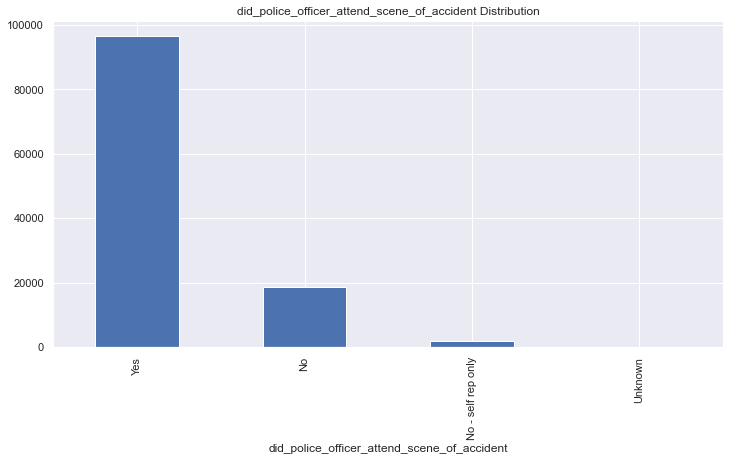

In [88]:
plt.figure(figsize=(12, 6))
accidents_last55.did_police_officer_attend_scene_of_accident.value_counts().plot(kind='bar')
plt.xlabel('did_police_officer_attend_scene_of_accident')
plt.title("did_police_officer_attend_scene_of_accident Distribution")
plt.show()

In [89]:
# recoding trunk_road_flag

accidents_last55['trunk_road_flag'] = accidents_last55['trunk_road_flag'].astype('category')
accidents_last55['trunk_road_flag'] = accidents_last55['trunk_road_flag'].cat.rename_categories({1: 'Trunk', 2: 'Non-Trunk', -1: 'Unknown'})

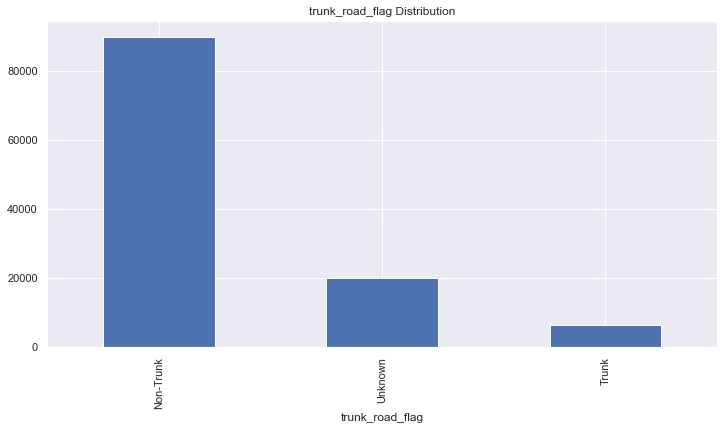

In [90]:
plt.figure(figsize=(12, 6))
accidents_last55.trunk_road_flag.value_counts().plot(kind='bar')
plt.xlabel('trunk_road_flag')
plt.title("trunk_road_flag Distribution")
plt.show()

In [91]:
accident_recode = Guide[Guide['table'] == 'Accident']

In [92]:
# recoding police_force

police_force_recode = accident_recode[accident_recode['field name'] == 'police_force']
police_force_recode = police_force_recode[['code/format','label']]

dico_police_force = police_force_recode.set_index('code/format').to_dict()

accidents_last55['police_force'] = accidents_last55['police_force'].astype('category')
accidents_last55['police_force'] = accidents_last55['police_force'].cat.rename_categories(dico_police_force['label'])

In [93]:
# recoding local_authority_district

local_authority_district_recode = accident_recode[accident_recode['field name'] == 'local_authority_district']
local_authority_district_recode = local_authority_district_recode[['code/format','label']]

dico_local_authority_district = local_authority_district_recode.set_index('code/format').to_dict()


accidents_last55['local_authority_district'] = accidents_last55['local_authority_district'].astype('category')
accidents_last55['local_authority_district'] = accidents_last55['local_authority_district'].cat.rename_categories(dico_local_authority_district['label'])

In [94]:
accidents_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116866 entries, 13 to 42356
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               116866 non-null  object        
 1   accident_year                                116866 non-null  int64         
 2   accident_reference                           116866 non-null  object        
 3   police_force                                 116866 non-null  category      
 4   accident_severity                            116866 non-null  category      
 5   number_of_vehicles                           116866 non-null  int64         
 6   number_of_casualties                         116866 non-null  int64         
 7   date                                         116866 non-null  datetime64[ns]
 8   day_of_week                                  116866 non-null  ca

# Vehicle data

In [95]:
# dropping status column

vehicle_last55 = vehicle_last55.drop(columns='status')

In [96]:
vehicle_recode = Guide[Guide['table'] == 'Vehicle']

In [97]:
# correcting mistaken field

vehicle_recode['label'][1303]='South'
vehicle_recode['label'][1313]='South'

In [98]:
# handling missing values

vehicle_last55['sex_of_driver'] = vehicle_last55['sex_of_driver'].replace([-1],3)
vehicle_last55['vehicle_left_hand_drive'] = vehicle_last55['vehicle_left_hand_drive'].replace([-1],9)
vehicle_last55['journey_purpose_of_driver'] = vehicle_last55['journey_purpose_of_driver'].replace([-1],15)



In [99]:
fields = pd.DataFrame(vehicle_recode['field name'].value_counts())
cat_fields = fields[fields['field name'] > 2]
cat_fields_name = list(cat_fields.index)

In [100]:
for field_name in cat_fields_name:
    recode = vehicle_recode[vehicle_recode['field name'] == field_name]
    recode = recode[['code/format','label']]
    dico = recode.set_index('code/format').to_dict()
    vehicle_last55[field_name] = vehicle_last55[field_name].astype('category')
    vehicle_last55[field_name] = vehicle_last55[field_name].cat.rename_categories(dico['label'])

In [101]:
vehicle_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182060 entries, 21 to 78410
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   accident_index                    182060 non-null  object  
 1   accident_year                     182060 non-null  int64   
 2   accident_reference                182060 non-null  object  
 3   vehicle_reference                 182060 non-null  int64   
 4   vehicle_type                      182060 non-null  category
 5   towing_and_articulation           182060 non-null  category
 6   vehicle_manoeuvre                 182060 non-null  category
 7   vehicle_direction_from            182060 non-null  category
 8   vehicle_direction_to              182060 non-null  category
 9   vehicle_location_restricted_lane  182060 non-null  category
 10  junction_location                 182060 non-null  category
 11  skidding_and_overturning          18206

In [102]:
# age_of_vehicle


vehicle_last55.age_of_vehicle.describe()

count    182060.000000
mean          5.223113
std           6.476178
min          -1.000000
25%          -1.000000
50%           3.000000
75%          10.000000
max          96.000000
Name: age_of_vehicle, dtype: float64

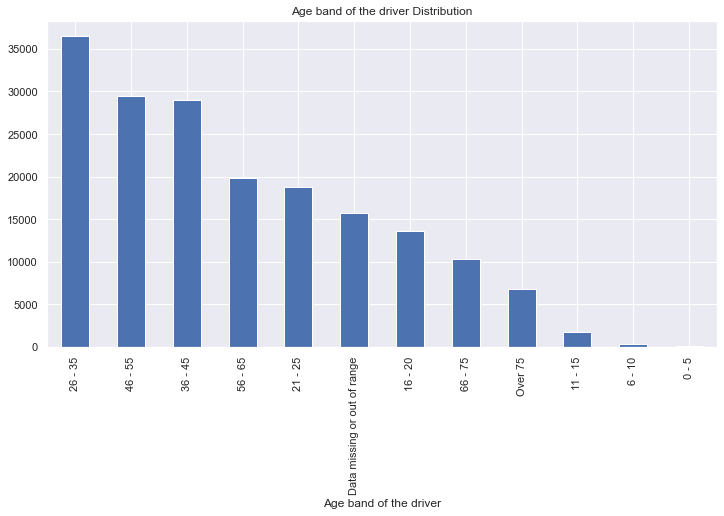

In [103]:
# age_band_of_driver

plt.figure(figsize=(12, 6))
vehicle_last55.age_band_of_driver.value_counts().plot(kind='bar')
plt.xlabel('Age band of the driver')
plt.title("Age band of the driver Distribution")
plt.show()

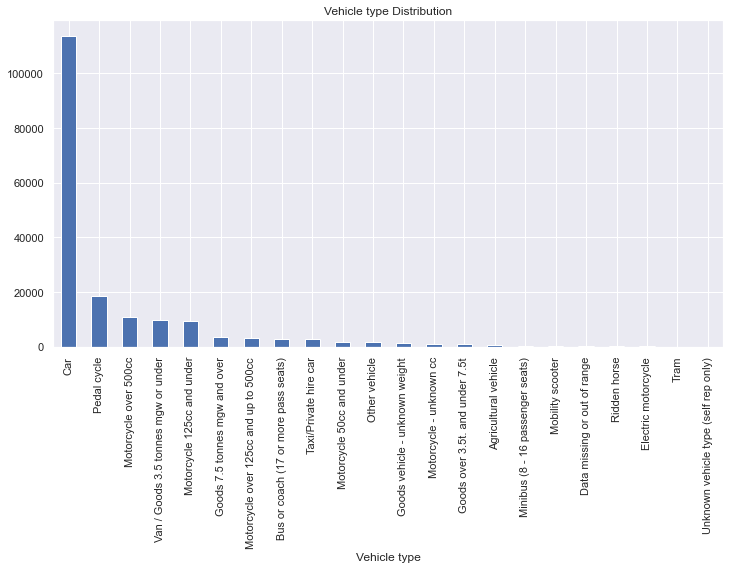

In [104]:
# vehicle_type

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_type.value_counts().plot(kind='bar')
plt.xlabel('Vehicle type')
plt.title("Vehicle type Distribution")
plt.show()

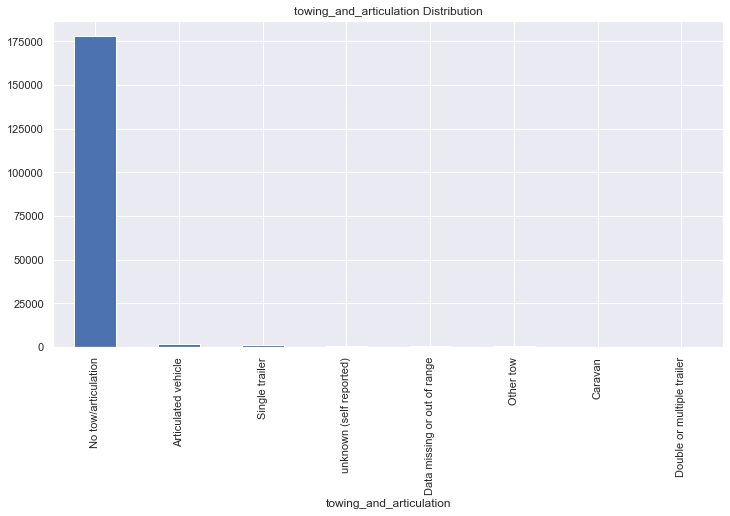

In [105]:
# towing_and_articulation

plt.figure(figsize=(12, 6))
vehicle_last55.towing_and_articulation.value_counts().plot(kind='bar')
plt.xlabel('towing_and_articulation')
plt.title("towing_and_articulation Distribution")
plt.show()

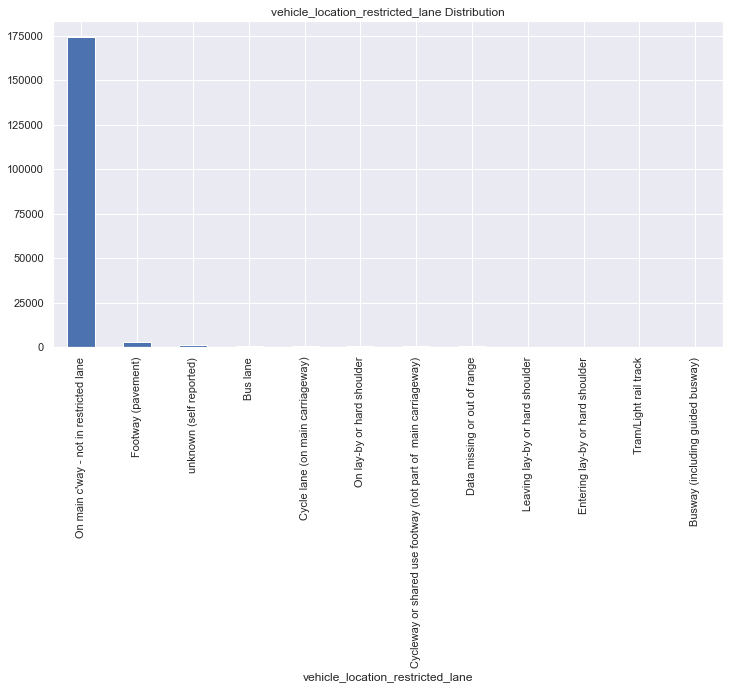

In [106]:
# vehicle_location_restricted_lane

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_location_restricted_lane.value_counts().plot(kind='bar')
plt.xlabel('vehicle_location_restricted_lane')
plt.title("vehicle_location_restricted_lane Distribution")
plt.show()

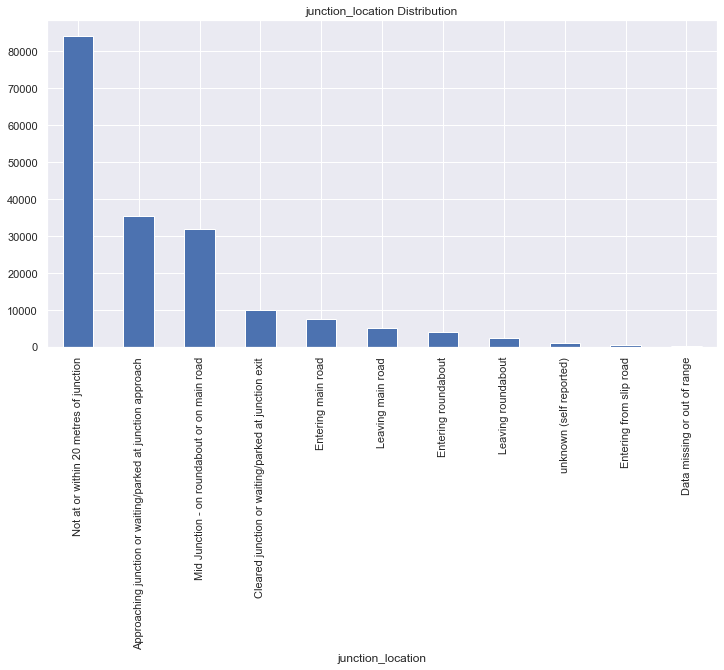

In [107]:
# junction_location

plt.figure(figsize=(12, 6))
vehicle_last55.junction_location.value_counts().plot(kind='bar')
plt.xlabel('junction_location')
plt.title("junction_location Distribution")
plt.show()

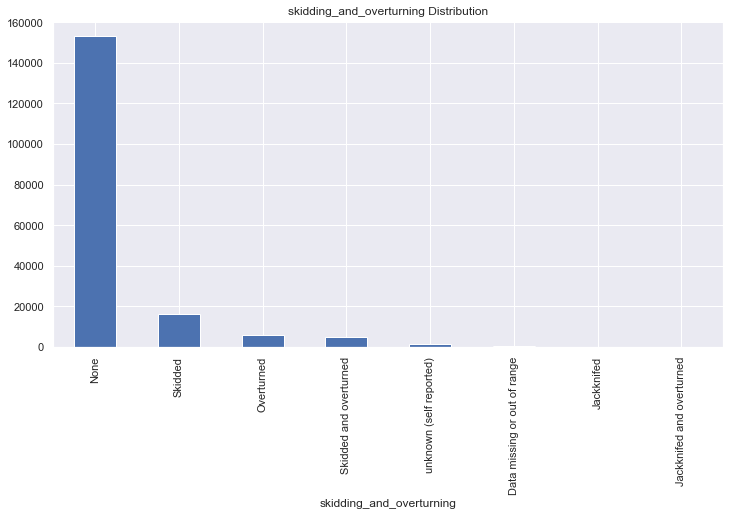

In [108]:
# skidding_and_overturning

plt.figure(figsize=(12, 6))
vehicle_last55.skidding_and_overturning.value_counts().plot(kind='bar')
plt.xlabel('skidding_and_overturning')
plt.title("skidding_and_overturning Distribution")
plt.show()

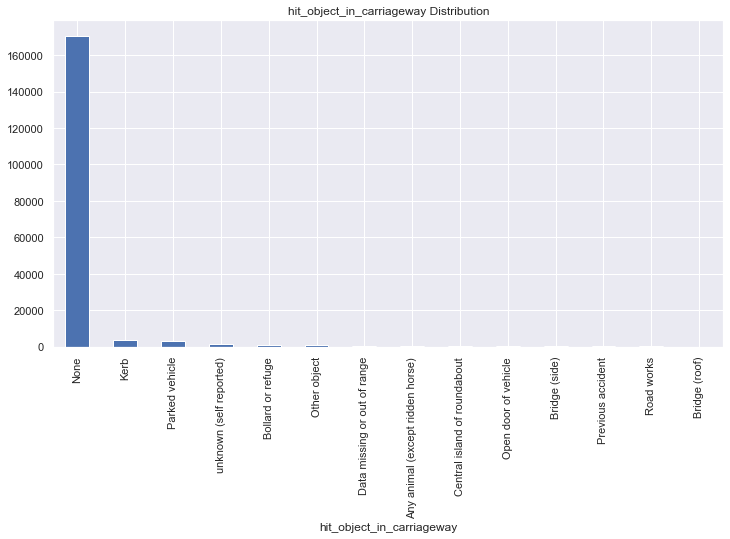

In [109]:
# hit_object_in_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.hit_object_in_carriageway.value_counts().plot(kind='bar')
plt.xlabel('hit_object_in_carriageway')
plt.title("hit_object_in_carriageway Distribution")
plt.show()

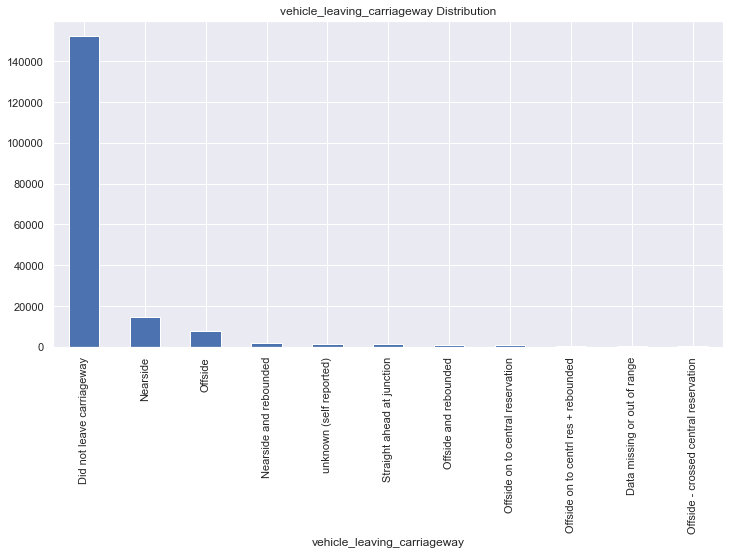

In [110]:
# vehicle_leaving_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_leaving_carriageway.value_counts().plot(kind='bar')
plt.xlabel('vehicle_leaving_carriageway')
plt.title("vehicle_leaving_carriageway Distribution")
plt.show()

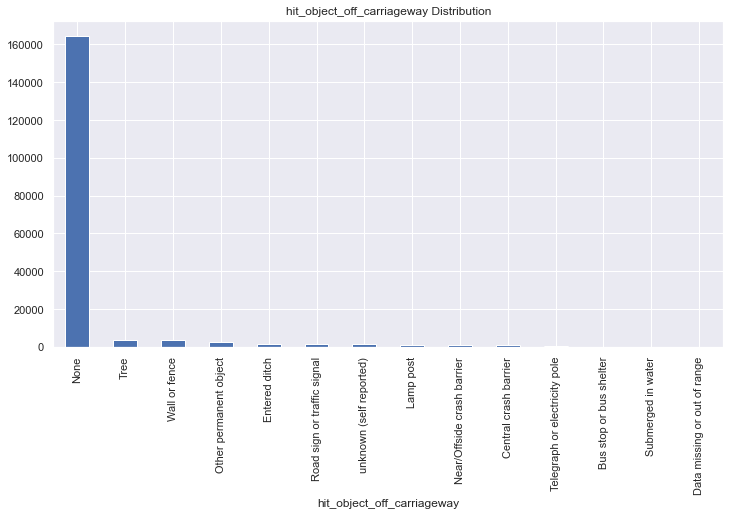

In [111]:
# hit_object_off_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.hit_object_off_carriageway.value_counts().plot(kind='bar')
plt.xlabel('hit_object_off_carriageway')
plt.title("hit_object_off_carriageway Distribution")
plt.show()

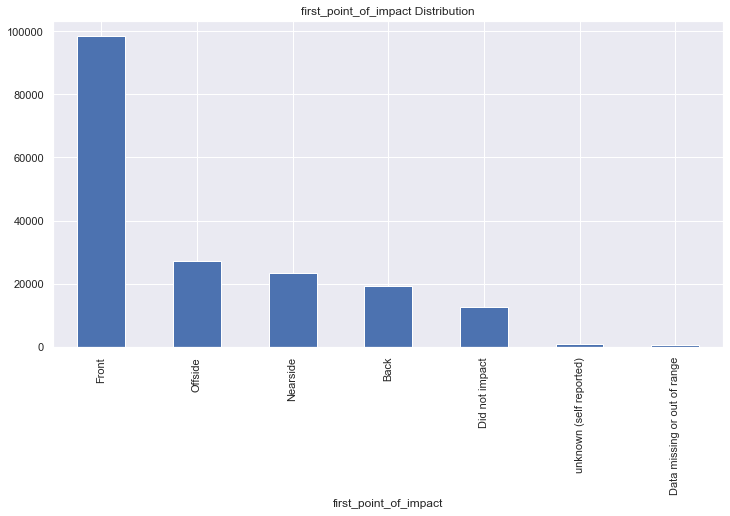

In [112]:
# first_point_of_impact

plt.figure(figsize=(12, 6))
vehicle_last55.first_point_of_impact.value_counts().plot(kind='bar')
plt.xlabel('first_point_of_impact')
plt.title("first_point_of_impact Distribution")
plt.show()

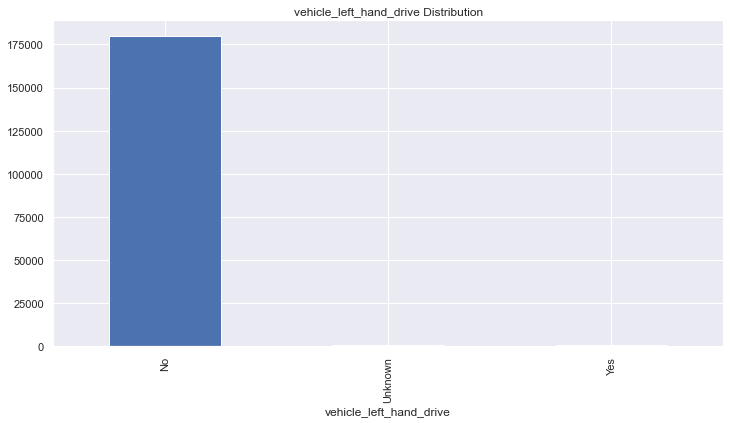

In [113]:
# vehicle_left_hand_drive

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_left_hand_drive.value_counts().plot(kind='bar')
plt.xlabel('vehicle_left_hand_drive')
plt.title("vehicle_left_hand_drive Distribution")
plt.show()

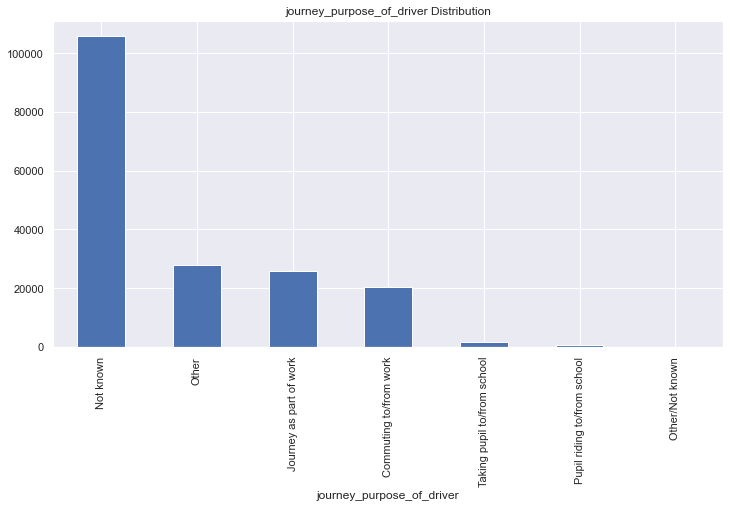

In [114]:
# journey_purpose_of_driver

plt.figure(figsize=(12, 6))
vehicle_last55.journey_purpose_of_driver.value_counts().plot(kind='bar')
plt.xlabel('journey_purpose_of_driver')
plt.title("journey_purpose_of_driver Distribution")
plt.show()

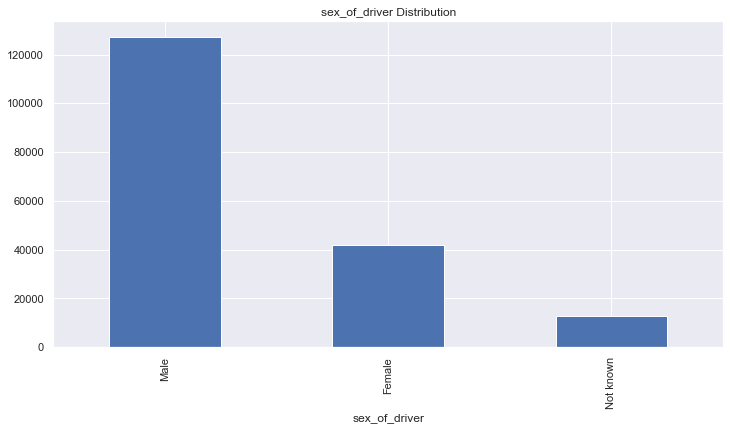

In [115]:
# sex_of_driver

plt.figure(figsize=(12, 6))
vehicle_last55.sex_of_driver.value_counts().plot(kind='bar')
plt.xlabel('sex_of_driver')
plt.title("sex_of_driver Distribution")
plt.show()

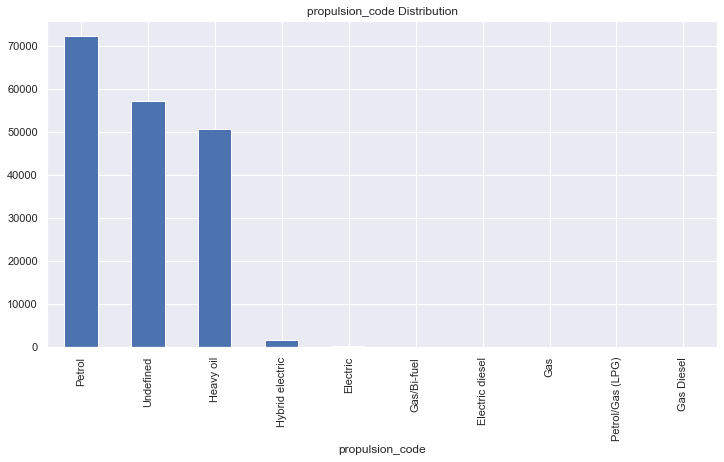

In [116]:
# propulsion_code

plt.figure(figsize=(12, 6))
vehicle_last55.propulsion_code.value_counts().plot(kind='bar')
plt.xlabel('propulsion_code')
plt.title("propulsion_code Distribution")
plt.show()

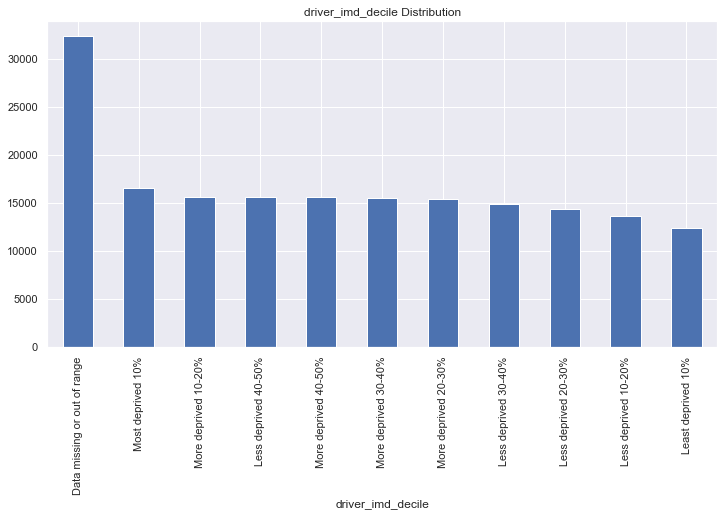

In [117]:
# driver_imd_decile

plt.figure(figsize=(12, 6))
vehicle_last55.driver_imd_decile.value_counts().plot(kind='bar')
plt.xlabel('driver_imd_decile')
plt.title("driver_imd_decile Distribution")
plt.show()

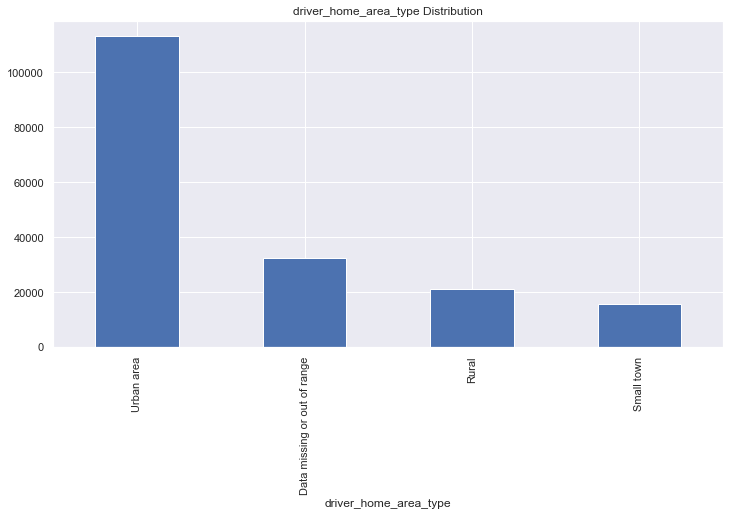

In [118]:
# driver_home_area_type

plt.figure(figsize=(12, 6))
vehicle_last55.driver_home_area_type.value_counts().plot(kind='bar')
plt.xlabel('driver_home_area_type')
plt.title("driver_home_area_type Distribution")
plt.show()

# Casualties

In [119]:
casualty_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141978 entries, 13 to 53173
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      141978 non-null  object
 1   accident_year                       141978 non-null  int64 
 2   accident_reference                  141978 non-null  object
 3   vehicle_reference                   141978 non-null  int64 
 4   casualty_reference                  141978 non-null  int64 
 5   casualty_class                      141978 non-null  int64 
 6   sex_of_casualty                     141978 non-null  int64 
 7   age_of_casualty                     141978 non-null  int64 
 8   age_band_of_casualty                141978 non-null  int64 
 9   casualty_severity                   141978 non-null  int64 
 10  pedestrian_location                 141978 non-null  int64 
 11  pedestrian_movement                 141

In [120]:
# dropping status column

casualty_last55 = casualty_last55.drop(columns='status')

In [121]:
# handling missing values

casualty_last55['sex_of_casualty'] = casualty_last55['sex_of_casualty'].replace([-1],3)
casualty_last55['car_passenger'] = casualty_last55['car_passenger'].replace([-1],9)

In [122]:
casualty_recode = Guide[Guide['table'] == 'Casualty']


In [123]:
casualty_fields = pd.DataFrame(casualty_recode['field name'].value_counts())
casualty_fields

,field name
casualty_type,30
pedestrian_location,12
age_band_of_casualty,12
casualty_imd_decile,11
pedestrian_movement,11
bus_or_coach_passenger,7
pedestrian_road_maintenance_worker,5
car_passenger,5
sex_of_casualty,4
casualty_home_area_type,4


In [124]:
casualty_cat_fields = casualty_fields[casualty_fields['field name'] > 2]
casualty_cat_fields_name = list(casualty_cat_fields.index)

In [125]:
casualty_cat_fields_name

['casualty_type',
 'pedestrian_location',
 'age_band_of_casualty',
 'casualty_imd_decile',
 'pedestrian_movement',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'car_passenger',
 'sex_of_casualty',
 'casualty_home_area_type',
 'casualty_severity',
 'casualty_class']

In [126]:
for field_name in casualty_cat_fields_name:
    recode = casualty_recode[casualty_recode['field name'] == field_name]
    recode = recode[['code/format','label']]
    casualty_dico = recode.set_index('code/format').to_dict()
    casualty_last55[field_name] = casualty_last55[field_name].astype('category')
    casualty_last55[field_name] = casualty_last55[field_name].cat.rename_categories(casualty_dico['label'])

In [127]:
casualty_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141978 entries, 13 to 53173
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   accident_index                      141978 non-null  object  
 1   accident_year                       141978 non-null  int64   
 2   accident_reference                  141978 non-null  object  
 3   vehicle_reference                   141978 non-null  int64   
 4   casualty_reference                  141978 non-null  int64   
 5   casualty_class                      141978 non-null  category
 6   sex_of_casualty                     141978 non-null  category
 7   age_of_casualty                     141978 non-null  int64   
 8   age_band_of_casualty                141978 non-null  category
 9   casualty_severity                   141978 non-null  category
 10  pedestrian_location                 141978 non-null  category
 11  pedestrian_mo

In [128]:
casualty_last55.casualty_class.dtype

CategoricalDtype(categories=['Driver or rider', 'Passenger', 'Pedestrian'], ordered=False)

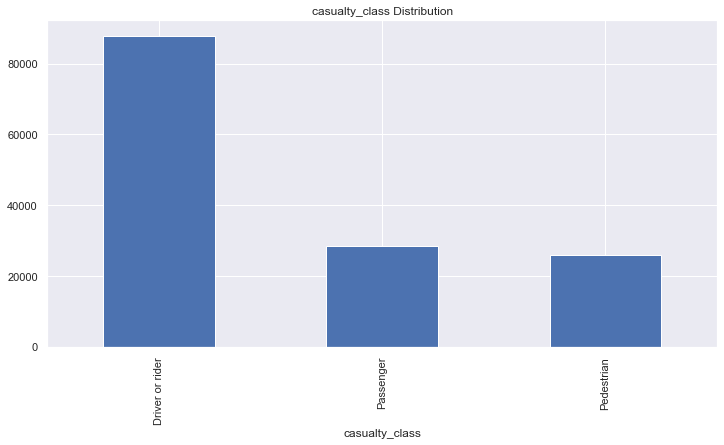

In [129]:
# casualty_class

plt.figure(figsize=(12, 6))
casualty_last55.casualty_class.value_counts().plot(kind='bar')
plt.xlabel('casualty_class')
plt.title("casualty_class Distribution")
plt.show()

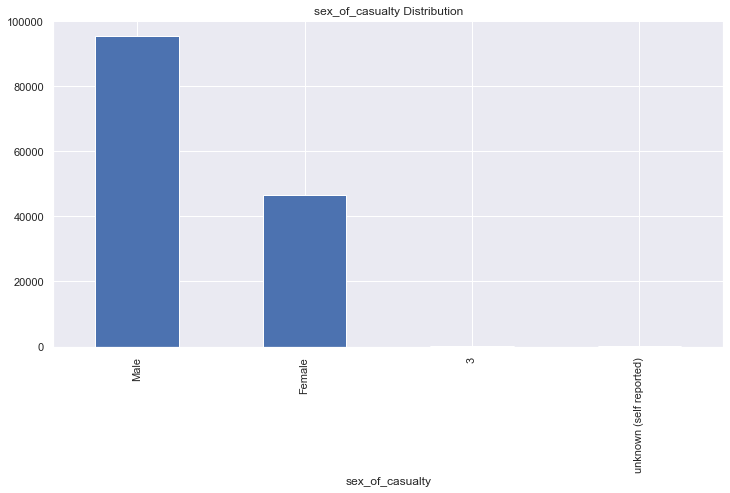

In [130]:
# sex_of_casualty

plt.figure(figsize=(12, 6))
casualty_last55.sex_of_casualty.value_counts().plot(kind='bar')
plt.xlabel('sex_of_casualty')
plt.title("sex_of_casualty Distribution")
plt.show()

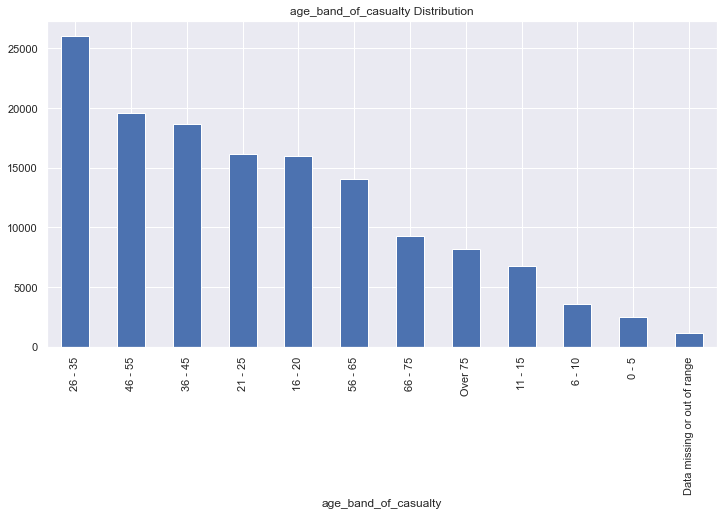

In [131]:
# age_band_of_casualty

plt.figure(figsize=(12, 6))
casualty_last55.age_band_of_casualty.value_counts().plot(kind='bar')
plt.xlabel('age_band_of_casualty')
plt.title("age_band_of_casualty Distribution")
plt.show()

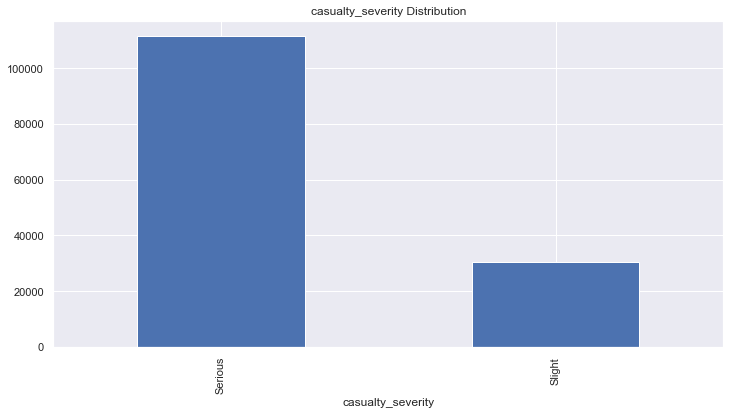

In [132]:
# casualty_severity

plt.figure(figsize=(12, 6))
casualty_last55.casualty_severity.value_counts().plot(kind='bar')
plt.xlabel('casualty_severity')
plt.title("casualty_severity Distribution")
plt.show()

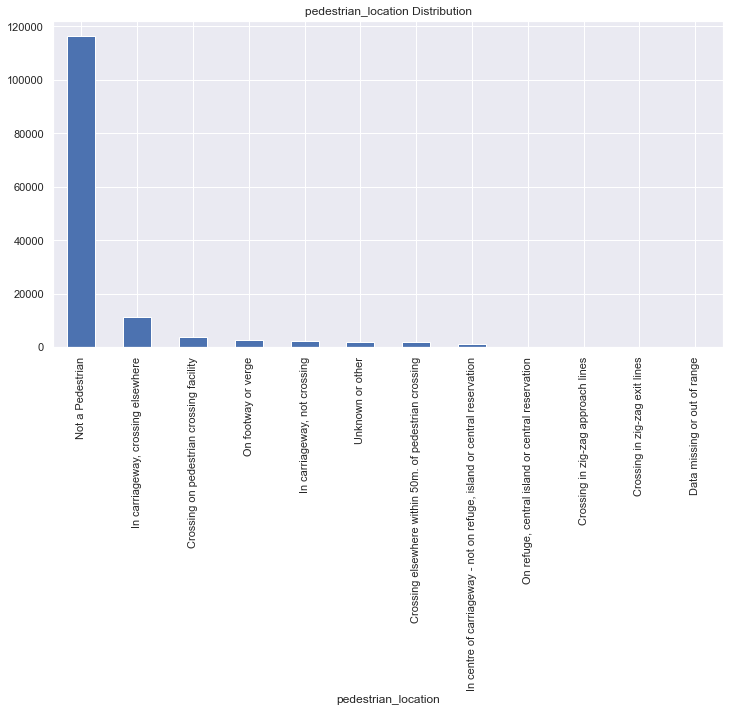

In [133]:
# pedestrian_location

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_location.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_location')
plt.title("pedestrian_location Distribution")
plt.show()

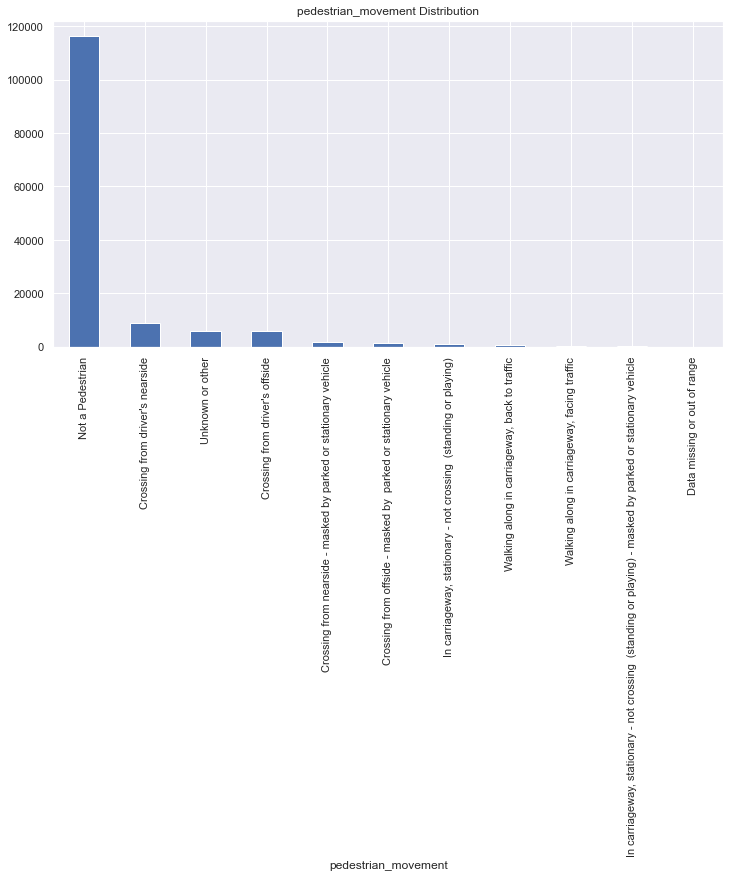

In [134]:
# pedestrian_movement

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_movement.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_movement')
plt.title("pedestrian_movement Distribution")
plt.show()

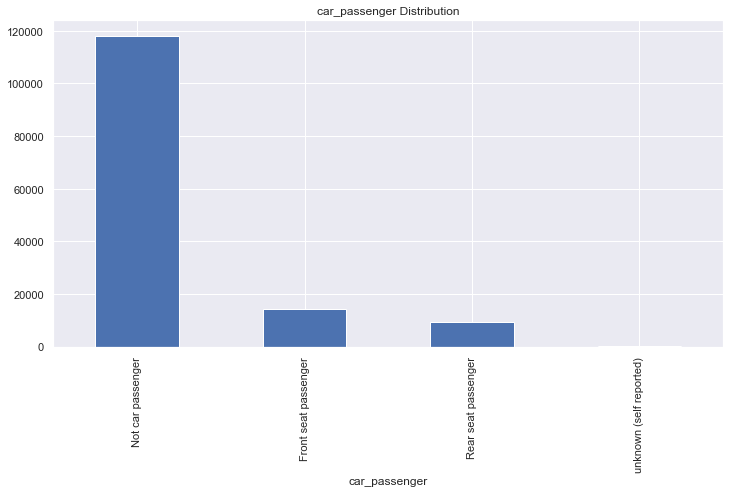

In [135]:
# car_passenger

plt.figure(figsize=(12, 6))
casualty_last55.car_passenger.value_counts().plot(kind='bar')
plt.xlabel('car_passenger')
plt.title("car_passenger Distribution")
plt.show()

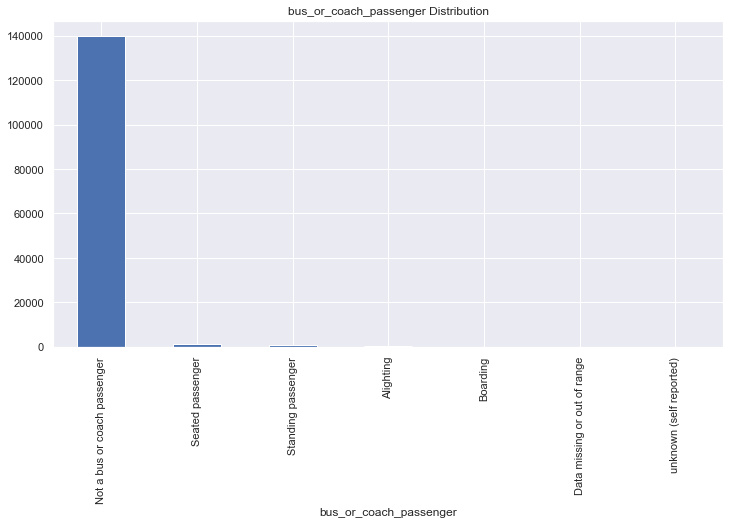

In [136]:
# bus_or_coach_passenger

plt.figure(figsize=(12, 6))
casualty_last55.bus_or_coach_passenger.value_counts().plot(kind='bar')
plt.xlabel('bus_or_coach_passenger')
plt.title("bus_or_coach_passenger Distribution")
plt.show()

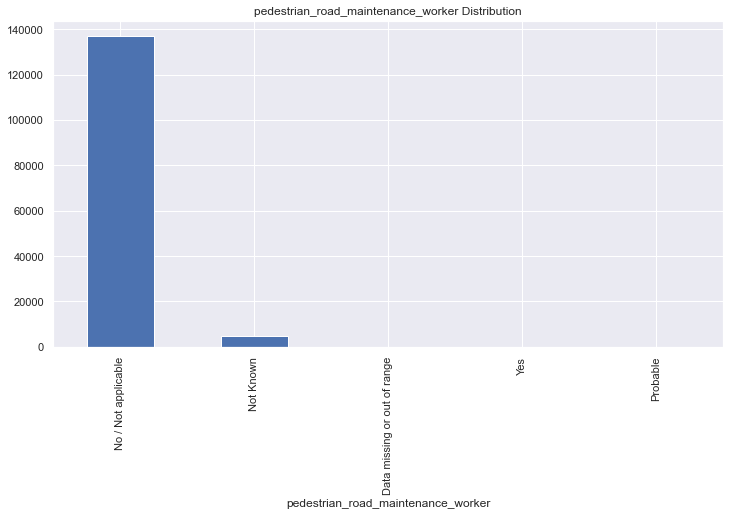

In [137]:
# pedestrian_road_maintenance_worker

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_road_maintenance_worker.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_road_maintenance_worker')
plt.title("pedestrian_road_maintenance_worker Distribution")
plt.show()

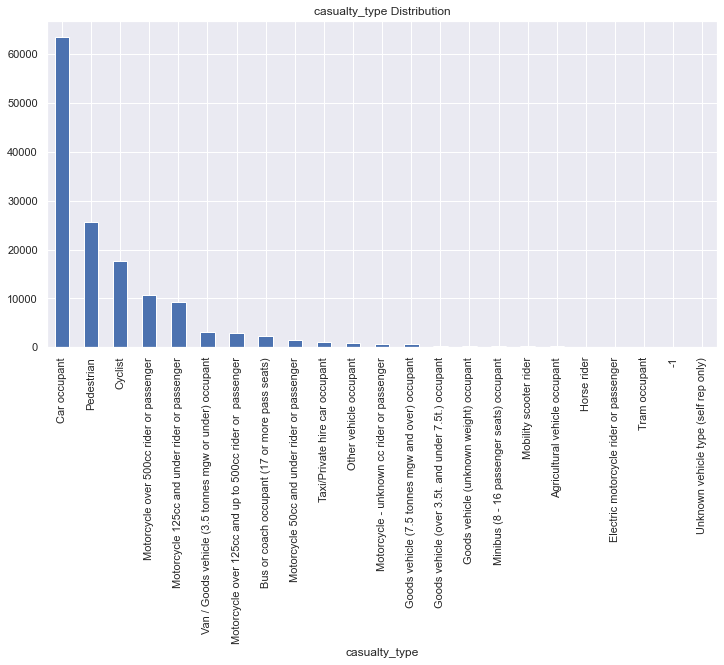

In [138]:
# casualty_type

plt.figure(figsize=(12, 6))
casualty_last55.casualty_type.value_counts().plot(kind='bar')
plt.xlabel('casualty_type')
plt.title("casualty_type Distribution")
plt.show()

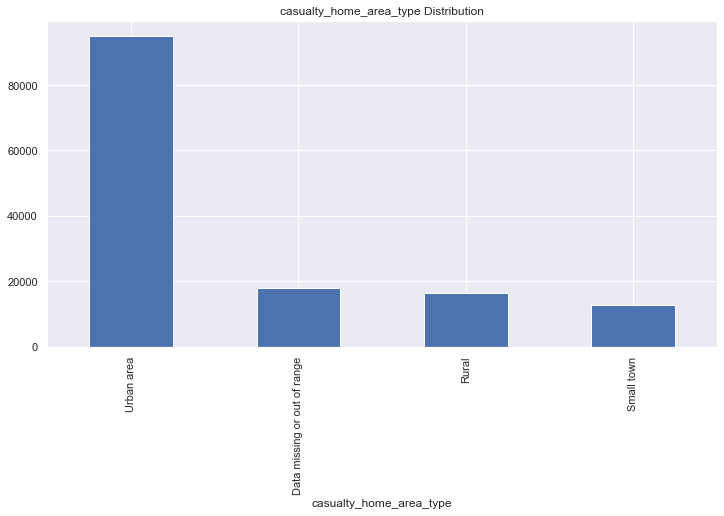

In [139]:
# casualty_home_area_type

plt.figure(figsize=(12, 6))
casualty_last55.casualty_home_area_type.value_counts().plot(kind='bar')
plt.xlabel('casualty_home_area_type')
plt.title("casualty_home_area_type Distribution")
plt.show()

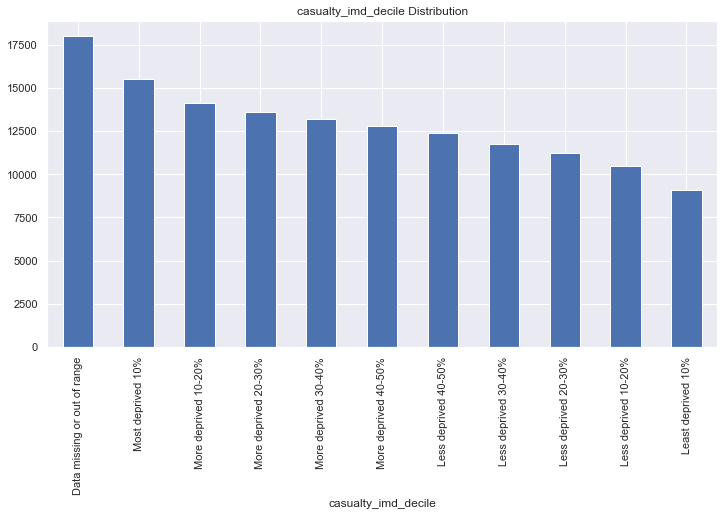

In [140]:
# casualty_imd_decile

plt.figure(figsize=(12, 6))
casualty_last55.casualty_imd_decile.value_counts().plot(kind='bar')
plt.xlabel('casualty_imd_decile')
plt.title("casualty_imd_decile Distribution")
plt.show()